In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats



Task 1

In [2]:
from scipy.stats import norm

a, b = 10, 10

N = 100
k = 61

prior = stats.beta(a, b)
likelihood = lambda thetas: 0.3*norm(-4, np.sqrt(2)).pdf(thetas) + 0.7*norm(3, np.sqrt(6)).pdf(thetas)
thetas = np.linspace(0, 1, 200)


In [3]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

In [4]:
def proposal(current, sigma, **kwargs):
    _ = kwargs
    current = np.asarray(current)
    sigma = np.asarray(sigma)
    return current + sigma * np.random.randn(*current.shape)


In [5]:
def value(theta, **kwargs):
    _ = kwargs
    return likelihood(theta)

p(x) = 0.3N(-4, 2) + 0.7N(3, 6)
0.3(-4 + sqrt(2)N(0, 1) ) + 0.7(3 + sqrt(6)N(0, 1))

-0.12 + sqrt(2)N(0, 1) + 0.21 + sqrt(6)N(0, 1)
N(0, 1)*(sqrt(2) + sqrt(6)) +0.09

In [409]:
post = metroplis(0, value, proposal, 3000, sigma=3)

<Figure size 720x360 with 0 Axes>

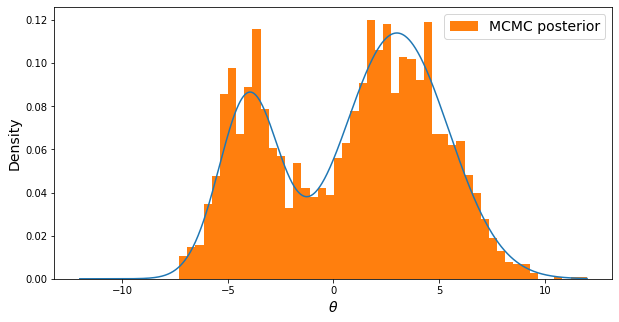

In [410]:
fig = plt.figure(figsize=(10, 5))

x = np.linspace(-12, 12, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)

fig, ax = plt.subplots(1, figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')
plt.plot(x, y)
fig.patch.set_facecolor('xkcd:white')
plt.hist(post, bins=50, density=True, label='MCMC posterior')
plt.legend(fontsize=14)
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

Task 2

In [89]:
def step_graf_2(start_graph, i, j):
    
    if start_graph[i][j] == 0:
        if start_graph[i][j+1] != 1 and start_graph[i][j-1] != 1 and start_graph[i+1][j] != 1 and start_graph[i-1][j] != 1:
            p = np.random.randint(2)
            if p == 1:
                start_graph[i][j] = 1
                return 1
                
    if start_graph[i][j] == 1:
        p = np.random.randint(2)
        if p == 0:
            start_graph[i][j] = 0
            return 2
        
    return 0

In [103]:
graph_2 = np.zeros((12,12))
N = 0
sam_power = 100000
weight_2 = np.zeros(sam_power)
while N < sam_power:
    number_0 = np.random.randint(1,11)
    number_1 = np.random.randint(1,11)
    step_graf_2(graph_2,number_0,number_1)
    weight_2[N] = graph_2.sum()
    N = N + 1


In [104]:
np.unique(weight_2, return_counts=True)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34.]),
 array([    4,     5,     2,     1,     4,    13,     6,     3,     4,
           11,    15,     8,    17,    53,   176,   416,  1056,  2201,
         3912,  6365,  9008, 11549, 13443, 13830, 12293,  9664,  7042,
         4599,  2321,  1228,   560,   136,    41,    14], dtype=int64))

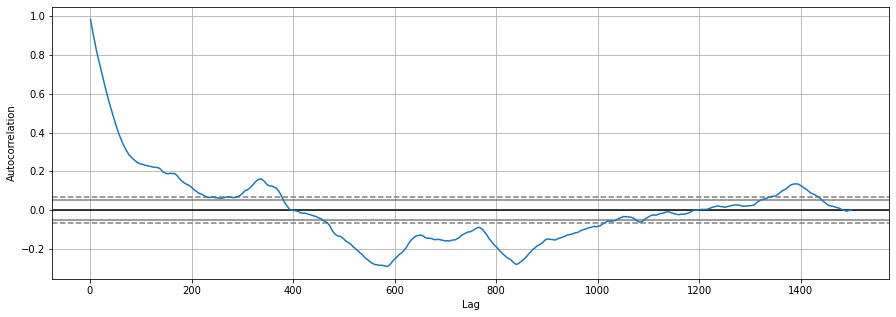

In [105]:
import pandas as pd

fig, ax = plt.subplots(1, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
pd.plotting.autocorrelation_plot(weight_2[:1500], ax=ax)
plt.show()

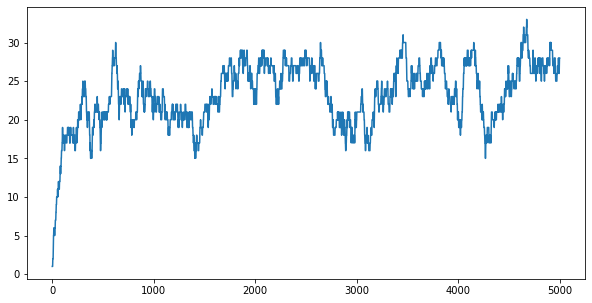

In [106]:
fig = plt.figure(figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')
plt.plot(weight_2[:5000])
plt.show()

In [107]:
print("Expected value")
print(np.mean(weight_2[200::400]))

Expected value
23.748
